# <center>Dados da Segurança Pública - RJ (Municípios)</center>

<p align="center">
  <img width="460" height="300" src="./governo-do-estado-rio-de-janeiro-logo-1-1.png">
</p>

### Bibliotecas Utilizadas:

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Versões
print('Python:', sys.version)
print('Pandas:', pd.__version__)
print('Numpy:', np.__version__)
#print('Matplotlib:', plt.__version__)
print('Seaborn:', sns.__version__)

import warnings
warnings.filterwarnings("ignore")

Python: 3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]
Pandas: 1.4.2
Numpy: 1.22.3
Seaborn: 0.11.2


### Carregando a base de dados (2014 - 2022)

<span style="color:green"> **Dados coletados do site: http://www.ispdados.rj.gov.br/estatistica.html** </span>

In [2]:
df = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep=';', encoding='unicode_escape')
df.head()

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,2,...,3,2,46,0,0,0,0,0,309,3


In [3]:
# Verificando as colunas
df.columns

Index(['fmun_cod', 'fmun', 'ano', 'mes', 'mes_ano', 'regiao', 'hom_doloso',
       'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial',
       'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_transeunte',
       'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo',
       'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 

### Descrição das colunas do DataFrame(df)
None da coluna | Descrição | Contagem | Observação
--------- | ------ | ------ | ------
fmun_cod | Código IBGE de 7 dígitos do município
fmun | Nome do município
ano | Ano da comunicação da ocorrência
mes | Mês da comunicação da ocorrência
mes_ano | Mês e ano da comunicação da ocorrência
regiao | 1-Baixada / 2-Capital / 3-Grande Niterói / 4-Interior
fase | 2-Consolidado sem errata / 3-Consolidado com errata
hom_doloso | Homicídio doloso | vítima
lesao_corp_morte | Lesão corporal seguida de morte | vítima
latrocinio | Latrocínio (roubo seguido de morte) | vítima
cvli | Crimes Violentos Letais Intencionais | vítima | Homicídio doloso + Lesão corporal seguida de morte + Latrocínio
hom_por_interv_policial | Morte por intervenção de agente do Estado | vítima
letalidade_violenta | Letalidade violenta | vítima | Homicídio doloso + Lesão corporal seguida de morte + Latrocínio + Morte por intervenção de agente do Estado
tentat_hom | Tentativa de homicídio | vítima
lesao_corp_dolosa | Lesão corporal dolosa | vítima
estupro | Estupro | vítima | "Em 2009, o Artigo 214 do Código Penal passou a caracterizar Atentado Violento ao Pudor (AVP) como Estupro. Por isso, antes de 2009, a variável ""estupro"" é na verdade a soma de ""estupro"" e ""AVP""."
hom_culposo | Homicídio culposo (trânsito) | vítima | Atropelamento + colisão + outros
lesao_corp_culposa | Lesão corporal culposa (trânsito) | vítima |Atropelamento + colisão + outros
roubo_transeunte | Roubo a transeunte | caso
roubo_celular | Roubo de telefone celular | caso
roubo_em_coletivo | Roubo em coletivo | caso
roubo_rua | Roubo de Rua | caso |Roubo a transeunte + Roubo de celular + Roubo em coletivo
roubo_veiculo | Roubo de veículo | caso
roubo_carga | Roubo de carga | caso
roubo_comercio | Roubo a estabelecimento comercial | caso
roubo_residencia | Roubo a residência | caso
roubo_banco | Roubo a banco | caso
roubo_cx_eletronico | Roubo de caixa eletrônico | caso
roubo_conducao_saque | Roubo com condução da vítima para saque em instituição financeira | caso
roubo_apos_saque | Roubo após saque em instituição financeira | caso
roubo_bicicleta | Roubo de bicicleta | caso
outros_roubos | Outros roubos que não os listados acima | caso | Inclui contagem de ocorrências de latrocínio
total_roubos | Total de roubos | caso | Soma de todos os roubos listados acima
furto_veiculos | Furto de veículo | caso
furto_transeunte | Furto a transeunte | caso
furto_coletivo | Furto em coletivo | caso
furto_celular | Furto de telefone celular | caso
furto_bicicleta | Furto de bicicleta | caso
outros_furtos | Outros furtos que não os listados acima | caso
total_furtos | Total de furtos | caso | Soma de todos os furtos listados acima
sequestro | Extorsão mediante sequestro (sequestro clássico) | vítima
extorsao | Extorsão | caso
sequestro_relampago | Extorsão com momentânea privação da liberdade (sequestro relâmpago) | vítima
estelionato | Estelionato | caso
apreensao_drogas | Apreensão de drogas | caso | Refere-se à aglutinação dos títulos de Uso/Porte, Tráfico e Apreensão de substância entorpecente
posse_drogas | Número de registros que possuem algum título referente a posse de drogas | caso | A soma dessas variáveis pode ser maior que o número de registros de apreensão de drogas, pois um mesmo registro pode conter mais de um tipo de apreensão de drogas.
trafico_drogas | Número de registros que possuem algum título referente a tráfico de drogas | caso 
apreensao_drogas_sem_autor | Número de registros que possuem algum título referente a apreensão de drogas sem autor | caso
recuperacao_veiculos | Recuperação de veículo | caso | Refere-se à recuperação de veículos, não necessariamente roubados/furtados durante o mês, e/ou roubados/furtados na mesma área.
apf | Auto de Prisão em Flagrante | autor
aaapai | Auto de Apreensão de Adolescente por Prática de Ato Infracional | adolescente infrator
cmp | Cumprimento de Mandado de Prisão | autor 
cmba | Cumprimento de Mandado de Busca e Apreensão | adolescente infrator
ameaca | Ameaça | vítima
pessoas_desaparecidas | Pessoas desaparecidas | vítima
encontro_cadaver | Encontro de cadáver | vítima
encontro_ossada | Encontro de ossada | vítima
pol_militares_mortos_serv | Policiais Militares mortos em serviço | vítima
pol_civis_mortos_serv | Policiais Civis mortos em serviço | vítima
registro_ocorrencias | Registro de ocorrências | caso | Total de registros de ocorrências divulgados no mês

In [4]:
dicionario_dados = dict()

dicionario_dados['fmun_cod'] = 'Código IBGE de 7 dígitos do município'
dicionario_dados['fmun'] = 'Nome do município'
dicionario_dados['ano'] = 'Ano da comunicação da ocorrência'
dicionario_dados['mes'] = 'Mês da comunicação da ocorrência'
dicionario_dados['mes_ano'] = 'Mês e ano da comunicação da ocorrência'
dicionario_dados['regiao'] = '1-Baixada / 2-Capital / 3-Grande Niterói / 4-Interior'
dicionario_dados['fase'] = '2-Consolidado sem errata / 3-Consolidado com errata'
dicionario_dados['hom_doloso'] = 'Homicídio doloso'
dicionario_dados['lesao_corp_morte'] = 'Lesão corporal seguida de morte'
dicionario_dados['latrocinio'] = 'Latrocínio (roubo seguido de morte)'
dicionario_dados['cvli'] = 'Crimes Violentos Letais Intencionais'
dicionario_dados['hom_por_interv_policial'] = 'Morte por intervenção de agente do Estado'
dicionario_dados['letalidade_violenta'] = 'Letalidade violenta'
dicionario_dados['tentat_hom'] = 'Tentativa de homicídio'
dicionario_dados['lesao_corp_dolosa'] = 'Lesão corporal dolosa'
dicionario_dados['estupro'] = 'Estupro'
dicionario_dados['hom_culposo'] = 'Homicídio culposo (trânsito)'
dicionario_dados['lesao_corp_culposa'] = 'Lesão corporal culposa (trânsito)'
dicionario_dados['roubo_transeunte'] = 'Roubo a transeunte'
dicionario_dados['roubo_celular'] = 'Roubo de telefone celular'
dicionario_dados['roubo_em_coletivo'] = 'Roubo em coletivo' 
dicionario_dados['roubo_rua'] = 'Roubo de Rua'
dicionario_dados['roubo_veiculo'] = 'Roubo de veículo'
dicionario_dados['roubo_carga'] = 'Roubo de carga' 
dicionario_dados['roubo_comercio'] = 'Roubo a estabelecimento comercial'
dicionario_dados['roubo_residencia'] = 'Roubo a residência'
dicionario_dados['roubo_banco'] = 'Roubo a banco'
dicionario_dados['roubo_cx_eletronico'] = 'Roubo de caixa eletrônico'
dicionario_dados['roubo_conducao_saque'] = 'Roubo com condução da vítima para saque em instituição financeira'
dicionario_dados['roubo_apos_saque'] = 'Roubo após saque em instituição financeira'
dicionario_dados['roubo_bicicleta'] = 'Roubo de bicicleta'
dicionario_dados['outros_roubos'] = 'Outros roubos que não os listados acima'
dicionario_dados['total_roubos'] = 'Total de roubos'
dicionario_dados['furto_veiculos'] = 'Furto de veículo'
dicionario_dados['furto_transeunte'] = 'Furto a transeunte'
dicionario_dados['furto_coletivo'] = 'Furto em coletivo'
dicionario_dados['furto_celular'] = 'Furto de telefone celular'
dicionario_dados['furto_bicicleta'] = 'Furto de bicicleta'
dicionario_dados['outros_furtos'] = 'Outros furtos que não os listados acima'
dicionario_dados['total_furtos'] = 'Total de furtos'
dicionario_dados['sequestro'] = 'Extorsão mediante sequestro (sequestro clássico)'
dicionario_dados['sequestro_relampago'] = 'Extorsão com momentânea privação da liberdade (sequestro relâmpago)'
dicionario_dados['apreensao_drogas'] = 'Apreensão de drogas'
dicionario_dados['posse_drogas'] = 'Número de registros que possuem algum título referente a posse de drogas'
dicionario_dados['trafico_drogas'] = 'Número de registros que possuem algum título referente a tráfico de drogas' 
dicionario_dados['apreensao_drogas_sem_autor'] = 'Número de registros que possuem algum título referente a apreensão de drogas sem autor'
dicionario_dados['recuperacao_veiculos'] = 'Recuperação de veículo'
dicionario_dados['apf'] = 'Auto de Prisão em Flagrante'
dicionario_dados['aaapai'] = 'Auto de Apreensão de Adolescente por Prática de Ato Infracional'
dicionario_dados['cmp'] = 'Cumprimento de Mandado de Prisão' 
dicionario_dados['cmba'] = 'Cumprimento de Mandado de Busca e Apreensão'
dicionario_dados['ameaca'] = 'Ameaça'
dicionario_dados['pessoas_desaparecidas'] = 'Pessoas desaparecidas'
dicionario_dados['encontro_cadaver'] = 'Encontro de cadáver'
dicionario_dados['encontro_ossada'] = 'Encontro de ossada'
dicionario_dados['pol_militares_mortos_serv'] = 'Policiais Militares mortos em serviço'
dicionario_dados['pol_civis_mortos_serv'] = 'Policiais Civis mortos em serviço'
dicionario_dados['registro_ocorrencias'] = 'Registro de ocorrências'

In [5]:
# Verificando a quandidade de linhas e colunas
df.shape

(9016, 60)

In [6]:
# Verificando se a valores nulos no dataframe
df.isnull().values.any() 

False

### Gráfico do Número de Homicídios/Ano

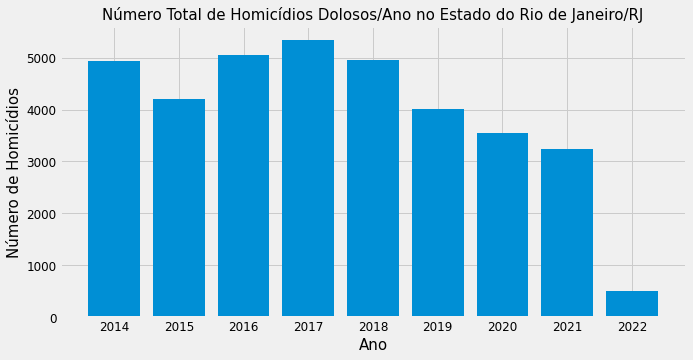

In [7]:
df_homicidios = df.groupby(['ano']).sum() #agrupando(ano) e somando os dados
df_homicidios.reset_index(inplace=True)
indice = np.arange(len(df_homicidios['ano']))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.bar(indice, df_homicidios['hom_doloso'])
plt.yticks(fontsize=12)
plt.xticks(indice, df_homicidios['ano'], fontsize=12,)
plt.xlabel("Ano", fontsize=15) #rotulo eixo X
plt.ylabel("Número de Homicídios", fontsize=15) #rotulo eixo Y
plt.title("Número Total de Homicídios Dolosos/Ano no Estado do Rio de Janeiro/RJ", fontsize=15) #título do gráfico
plt.show()

### Análise Descritiva Homicídios por Ano - Mensal (Em todo o estado Rio de Janeiro)

In [8]:
df_homicidios_ano = df[['ano','mes','hom_doloso']]

df_homicidios_analise_descritiva = pd.DataFrame(
    columns=['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023'], 
    index=['Total','Média Mensal','Média Diária','Mínimo Mensal','Mediana Mensal','Máximo Mensal','Desvio Padrão'])

anos = ['2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']

for ano in anos:
    df_homicidios_ano_total = df_homicidios_ano.query(f'ano == {ano}')
    df_homicidios_ano_group = df_homicidios_ano_total.groupby(['mes']).sum()
    df_homicidios_analise_descritiva[f'{ano}'].loc[:1] = round(df_homicidios_ano_group['hom_doloso'].sum(), 2)
    df_homicidios_analise_descritiva[f'{ano}'].loc[1:2] = round(df_homicidios_ano_group['hom_doloso'].mean(), 2)
    df_homicidios_analise_descritiva[f'{ano}'].loc[2:3] = round(df_homicidios_ano_group['hom_doloso'].mean() / 30, 2) 
    df_homicidios_analise_descritiva[f'{ano}'].loc[3:4] = round(df_homicidios_ano_group['hom_doloso'].min(), 2)
    df_homicidios_analise_descritiva[f'{ano}'].loc[4:5] = round(df_homicidios_ano_group['hom_doloso'].median(), 2)
    df_homicidios_analise_descritiva[f'{ano}'].loc[5:6] = round(df_homicidios_ano_group['hom_doloso'].max(), 2)
    df_homicidios_analise_descritiva[f'{ano}'].loc[6:7] = round(df_homicidios_ano_group['hom_doloso'].std(), 2)

df_homicidios_analise_descritiva

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Total,4942,4200,5042,5346,4950,4004,3544,3247,504,0
Média Mensal,411.83,350.0,420.17,445.5,412.5,333.67,295.33,270.58,252.0,NaN
Média Diária,13.73,11.67,14.01,14.85,13.75,11.12,9.84,9.02,8.4,NaN
Mínimo Mensal,345,272,368,374,346,310,239,229,251,NaN
Mediana Mensal,392.5,343.5,415.5,450.0,396.5,326.5,280.0,262.5,252.0,NaN
Máximo Mensal,510,439,475,503,508,386,374,368,253,NaN
Desvio Padrão,55.98,42.52,40.87,42.78,51.11,21.99,43.0,40.32,1.41,NaN


###  Homicídios por Região (Em todo o estado Rio de Janeiro)

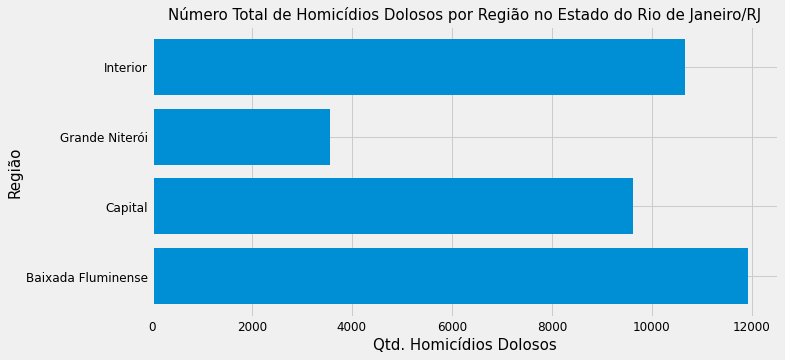

In [9]:
df_homicidios_regiao = df[['ano','mes','regiao','hom_doloso']]
df_homicidios_regiao_group = df_homicidios_regiao.groupby(['regiao']).sum()
df_homicidios_regiao_group.reset_index(inplace=True)
indice_homicidios_regiao = np.arange(len(df_homicidios_regiao_group['ano']))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.barh(df_homicidios_regiao_group['regiao'],df_homicidios_regiao_group['hom_doloso'])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Qtd. Homicídios Dolosos", fontsize=15) #rotulo eixo X
plt.ylabel("Região", fontsize=15) #rotulo eixo Y
plt.title("Número Total de Homicídios Dolosos(2014 - 2022) por Região no Estado do Rio de Janeiro/RJ", fontsize=15) #título do gráfico
plt.show()

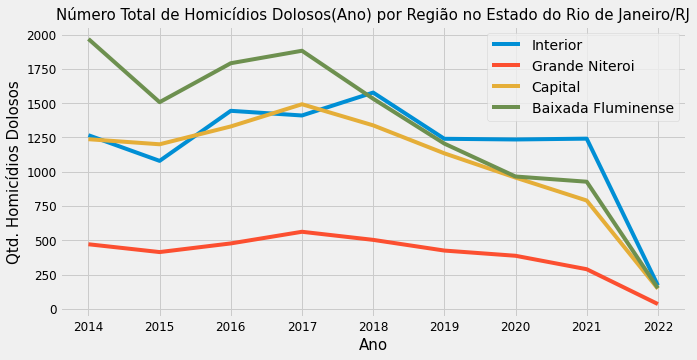

In [10]:
df_homicidios_ano_regiao = df[['ano','mes','regiao','hom_doloso']]
df_homicidios_ano_regiao_group = df_homicidios_ano_regiao.groupby(['ano','regiao']).sum()
df_homicidios_ano_regiao_group.reset_index(inplace=True)

df_homicidios_ano_regiao_interior = df_homicidios_ano_regiao_group.query('regiao == "Interior"')
df_homicidios_ano_regiao_grandeniteroi = df_homicidios_ano_regiao_group.query('regiao == "Grande Niterói"')
df_homicidios_ano_regiao_capital = df_homicidios_ano_regiao_group.query('regiao == "Capital"')
df_homicidios_ano_regiao_baixadafluminense = df_homicidios_ano_regiao_group.query('regiao == "Baixada Fluminense"')

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.plot(df_homicidios_ano_regiao_interior['ano'], df_homicidios_ano_regiao_interior['hom_doloso'])
plt.plot(df_homicidios_ano_regiao_grandeniteroi['ano'], df_homicidios_ano_regiao_grandeniteroi['hom_doloso'])
plt.plot(df_homicidios_ano_regiao_capital['ano'], df_homicidios_ano_regiao_capital['hom_doloso'])
plt.plot(df_homicidios_ano_regiao_baixadafluminense['ano'], df_homicidios_ano_regiao_baixadafluminense['hom_doloso'])
plt.legend(['Interior','Grande Niteroi','Capital','Baixada Fluminense'])
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Ano", fontsize=15) #rotulo eixo X
plt.ylabel("Qtd. Homicídios Dolosos", fontsize=15) #rotulo eixo Y
plt.title("Número Total de Homicídios Dolosos(Ano) por Região no Estado do Rio de Janeiro/RJ", fontsize=15) #título do gráfico
plt.show()


### Homicídios por Municípios (Em todo o estado Rio de Janeiro)

#### OBS.: graficos feitos com os 10 maiores municípios por população

<span style="color:green"> **Site: https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Rio_de_Janeiro_por_popula%C3%A7%C3%A3o** </span>

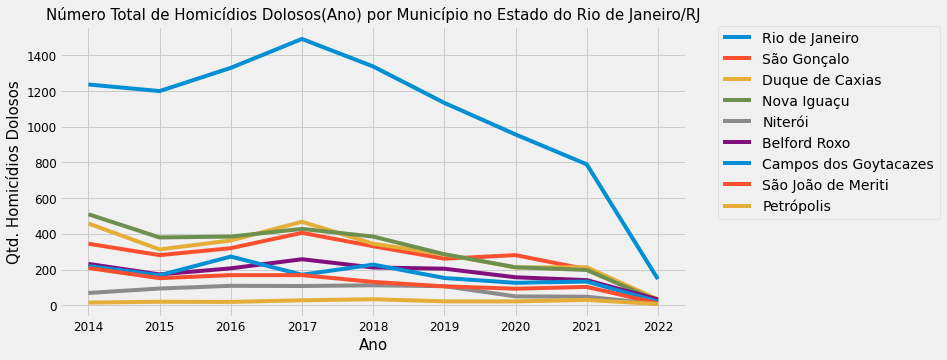

,ano,fmun,hom_doloso
54,2014,Petrópolis,15
146,2015,Petrópolis,20
238,2016,Petrópolis,19
330,2017,Petrópolis,28
422,2018,Petrópolis,34
514,2019,Petrópolis,22
606,2020,Petrópolis,22
698,2021,Petrópolis,30
790,2022,Petrópolis,7


In [32]:
df_homicidios_ano_municipios = df[['ano','fmun','hom_doloso']]
df_homicidios_ano_municipios_group = df_homicidios_ano_municipios.groupby(['ano','fmun']).sum()
df_homicidios_ano_municipios_group.reset_index(inplace=True)
df_homicidios_ano_municipios_group_riodejaneiro = df_homicidios_ano_municipios_group.query('fmun == "Rio de Janeiro"')
df_homicidios_ano_municipios_group_saogoncalo = df_homicidios_ano_municipios_group.query('fmun == "São Gonçalo"')
df_homicidios_ano_municipios_group_duquedecaxias = df_homicidios_ano_municipios_group.query('fmun == "Duque de Caxias"')
df_homicidios_ano_municipios_group_novaiguacu = df_homicidios_ano_municipios_group.query('fmun == "Nova Iguaçu"')
df_homicidios_ano_municipios_group_niteroi = df_homicidios_ano_municipios_group.query('fmun == "Niterói"')
df_homicidios_ano_municipios_group_belfordroxo = df_homicidios_ano_municipios_group.query('fmun == "Belford Roxo"')
df_homicidios_ano_municipios_group_camposdosgoytacazes = df_homicidios_ano_municipios_group.query('fmun == "Campos dos Goytacazes"')
df_homicidios_ano_municipios_group_saojoaodemeriti = df_homicidios_ano_municipios_group.query('fmun == "São João de Meriti"')
df_homicidios_ano_municipios_group_petropolis = df_homicidios_ano_municipios_group.query('fmun == "Petrópolis"')


plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,5))
plt.plot(df_homicidios_ano_municipios_group_riodejaneiro['ano'], df_homicidios_ano_municipios_group_riodejaneiro['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_saogoncalo['ano'], df_homicidios_ano_municipios_group_saogoncalo['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_duquedecaxias['ano'], df_homicidios_ano_municipios_group_duquedecaxias['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_novaiguacu['ano'], df_homicidios_ano_municipios_group_novaiguacu['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_niteroi['ano'], df_homicidios_ano_municipios_group_niteroi['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_belfordroxo['ano'], df_homicidios_ano_municipios_group_belfordroxo['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_camposdosgoytacazes['ano'], df_homicidios_ano_municipios_group_camposdosgoytacazes['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_saojoaodemeriti['ano'], df_homicidios_ano_municipios_group_saojoaodemeriti['hom_doloso'])
plt.plot(df_homicidios_ano_municipios_group_petropolis['ano'], df_homicidios_ano_municipios_group_petropolis['hom_doloso'])

plt.legend(['Rio de Janeiro','São Gonçalo','Duque de Caxias','Nova Iguaçu','Niterói','Belford Roxo','Campos dos Goytacazes',
            'São João de Meriti','Petrópolis'], 
                bbox_to_anchor=(1.05, 1),
                loc='upper left', 
                borderaxespad=0.)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Ano", fontsize=15) #rotulo eixo X
plt.ylabel("Qtd. Homicídios Dolosos", fontsize=15) #rotulo eixo Y
plt.title("Número Total de Homicídios Dolosos(Ano) por Município no Estado do Rio de Janeiro/RJ", fontsize=15) #título do gráfico
plt.show()

In [ ]:
df_homicidios_ano_regiao = df[['ano','mes','regiao','hom_doloso']]
df_homicidios_ano_regiao_group = df_homicidios_ano_regiao.groupby(['ano']).sum()
df_homicidios_ano_regiao_group

#sns.set_style('fivethirtyeight')
plt.style.use('fivethirtyeight')
plt.figure(figsize =(11, 6))
sns.boxplot(data=df_homicidios_ano_regiao, y=df_homicidios_ano_regiao['regiao'], x='hom_doloso')
plt.title("Número de Homicídios Dolosos/Ano no Estado do Rio de Janeiro/RJ", fontsize=15) #título do gráfico
plt.ylabel("Região", fontsize=15) #rotulo eixo Y
plt.xlabel("Homicídios Dolosos", fontsize=15); #rotulo eixo X